# **Simpson's Paradox**

### Report By :-
- **Dibyendu Das**
- **Dipan Banik**
- **Nilotpal Sarkar**
- **Srijan Mallick**
- **Oishik Dasgupta**

In [147]:
from IPython.display import Image
Image(url= "data/download.jpeg", width=400, height=400)

## What is **Simpson's Paradox** ???

**Simpson's paradox**, also called **Yule-Simpson effect**, is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined. These phenomenon is often encountered in social science and medical science statistics. 


### **Theoritical Example**

For example there are two friends **A** and **B** who are preparing for a competitive test and they decide to take two take two mock examination this weekend whoose outcomes are as follows:- 

In [1]:
from IPython.display import Image
Image(url= "wTYs7N2t0j-image-1.png", width=400, height=400)

This seemingly unintuitive possibility is referred to as Simpson's paradox.

Let's go back to our example on problem accuracy competition to see how this can occur.

* On Saturday you solved 7 out of 8 attempted problems, but your friend solved 2 out of 2. You had solved more problems, but your friend pointed out that he was more accurate, since $\frac{7}{8}$<$\frac{2}{2}$. Fair enough.

* On Sunday, you only attempted 2 problems and got 1 correct. Your friend got 55 out of 88 problems correct. Your friend gloated once again, since $\frac{1}{2}$ < $\frac{5}{8}$ 


However, the competition is about the one who solved more accurately over the weekend, not on individual days. Overall, you have solved 8 out of 10 problems whereas your friend has solved 7 out of 10 problems. Thus, despite your friend solving a higher proportion of problems on each day, you actually won the challenge by solving the higher proportion for the entire weekend! While your friend got furious, you calmly pointed him to this page: you had just shown an instance of **Simpson's paradox**.

## **Simulated Problem**

### **Correlation Reversal: Hours of Exercise vs Chance of Developing Disease**

### **Problem Description**

This is another example showing Simpson's Paradox in the context of a correlation reversal. 
* When looking at the data individually, there is a negative correlation between hours of exercise and chance of developing a disease, but when aggregating the data, the correlation reverses! 
* This is due to the presence of another cause, age, on the chance of developing a disease. In order to determine the effect of exercise on the probability of disease, we need to control for the age of patients.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
%matplotlib inline

### **Dataset Under 50**

In [3]:
n_samples=100
np.random.seed(42)
ages=np.random.randint(20,50,n_samples)
hours=np.random.randint(1,5,n_samples)+np.random.randn(n_samples)
p = (12 + 0.5 * ages + -2.1 * hours + np.random.randn(n_samples) *  2)/100
Under_50=pd.DataFrame({'Age': ages, 'Workout_Hours': hours, 'Probability': p})

In [4]:
Under_50

,Age,Workout_Hours,Probability
0,26,3.794281,0.161070
1,39,2.580690,0.238556
2,48,4.297650,0.287094
3,34,0.971884,0.288759
4,30,1.581404,0.245153
...,...,...,...
95,48,1.906060,0.321656
96,37,1.120543,0.300921
97,45,2.196822,0.329756
98,31,0.995143,0.260983


### **Dataset Over 50**

In [5]:
n_samples = 100
ages = np.random.randint(50, 85, n_samples)
hours = np.random.randint(3, 8, n_samples) + np.random.randn(n_samples) * 0.5
p = (40 + 0.32 * ages + -3.2 * hours + np.random.randn(n_samples) )/100
Over_50 = pd.DataFrame({'Age': ages, 'Workout_Hours': hours, 'Probability': p})


In [6]:
Over_50

,Age,Workout_Hours,Probability
0,69,4.942730,0.453876
1,73,7.618908,0.375967
2,61,5.202786,0.437973
3,84,4.700312,0.537484
4,82,4.002622,0.520330
...,...,...,...
95,56,3.569358,0.468317
96,74,3.761562,0.526805
97,53,5.269455,0.395877
98,55,4.481377,0.429897


## Plot of The Relationhips

### Workout Hours Vs. Probability

Text(0.2, 0.75, '$\\rho$ = -0.86')

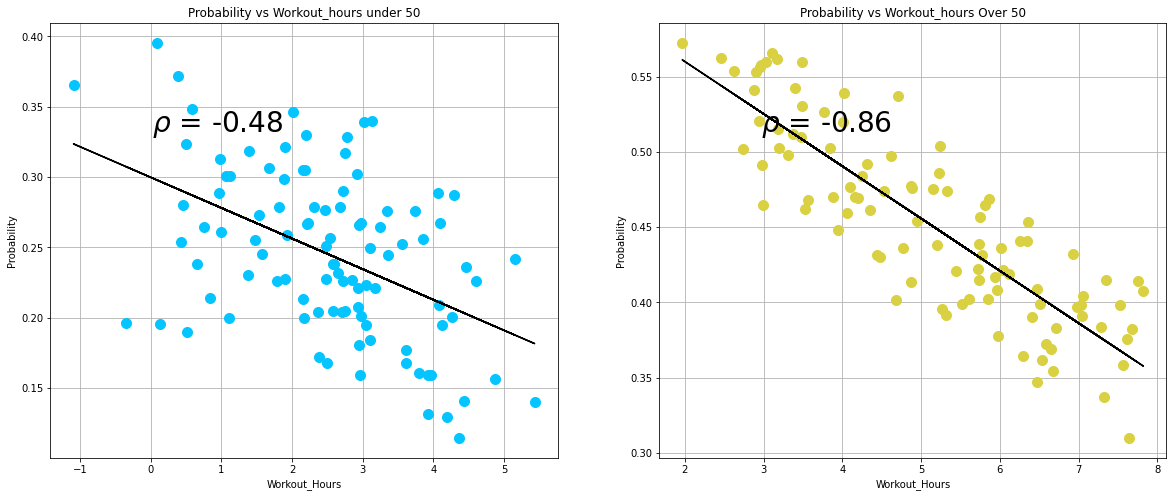

In [7]:
plt.figure(figsize = (20, 8))
x1,y1=np.array(Under_50["Workout_Hours"]),np.array(Under_50["Probability"])
b,m=polyfit(x1,y1,1)
Under_50.plot(x="Workout_Hours",y="Probability",c='#04c5ff',style="o",legend=None,ax=plt.subplot(1, 2, 1),ms=10)
plt.plot(x1, m * x1 + b, '-', color = 'k')
plt.grid()
plt.title(f'Probability vs {"Workout_Hours".capitalize()} under 50')
corr_coef = np.corrcoef(x1, y1)[0][1]
ax=plt.gca()
plt.ylabel("Probability")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k',
             transform=ax.transAxes)
x2,y2=np.array(Over_50["Workout_Hours"]),np.array(Over_50["Probability"])
b,m=polyfit(x2,y2,1)
Over_50.plot(x="Workout_Hours",y="Probability",c='#d9d142',style="o",legend=None,ax=plt.subplot(1, 2, 2),ms=10)
plt.plot(x2, m * x2 + b, '-', color = 'k')
plt.grid()
plt.title(f'Probability vs {"Workout_Hours".capitalize()} Over 50')
corr_coef = np.corrcoef(x2, y2)[0][1]
ax=plt.gca()
plt.ylabel("Probability")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

In [8]:
combined = pd.concat([Under_50, Over_50], axis = 0)
combined=combined.reset_index()
combined=combined.drop(columns="index")
combined

,Age,Workout_Hours,Probability
0,26,3.794281,0.161070
1,39,2.580690,0.238556
2,48,4.297650,0.287094
3,34,0.971884,0.288759
4,30,1.581404,0.245153
...,...,...,...
195,56,3.569358,0.468317
196,74,3.761562,0.526805
197,53,5.269455,0.395877
198,55,4.481377,0.429897


Text(0.2, 0.75, '$\\rho$ = 0.33')

<Figure size 720x576 with 0 Axes>

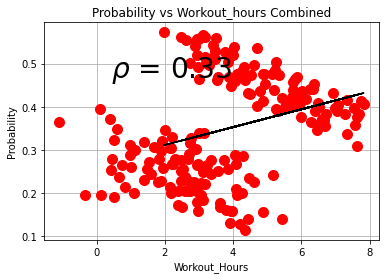

In [9]:
plt.figure(figsize = (10, 8))
x3,y3=np.array(combined["Workout_Hours"]),np.array(combined["Probability"])
b,m=polyfit(x3,y3,1)
combined.plot(x="Workout_Hours",y="Probability",c='r',style="o",legend=None,ms=10)
plt.plot(x2, m * x2 + b, '-', color = 'k')
plt.grid()
plt.title(f'Probability vs {"Workout_Hours".capitalize()} Combined')
corr_coef = np.corrcoef(x3, y3)[0][1]
ax=plt.gca()
plt.ylabel("Probability")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

### Age Vs. Probability

Text(0.2, 0.75, '$\\rho$ = 0.59')

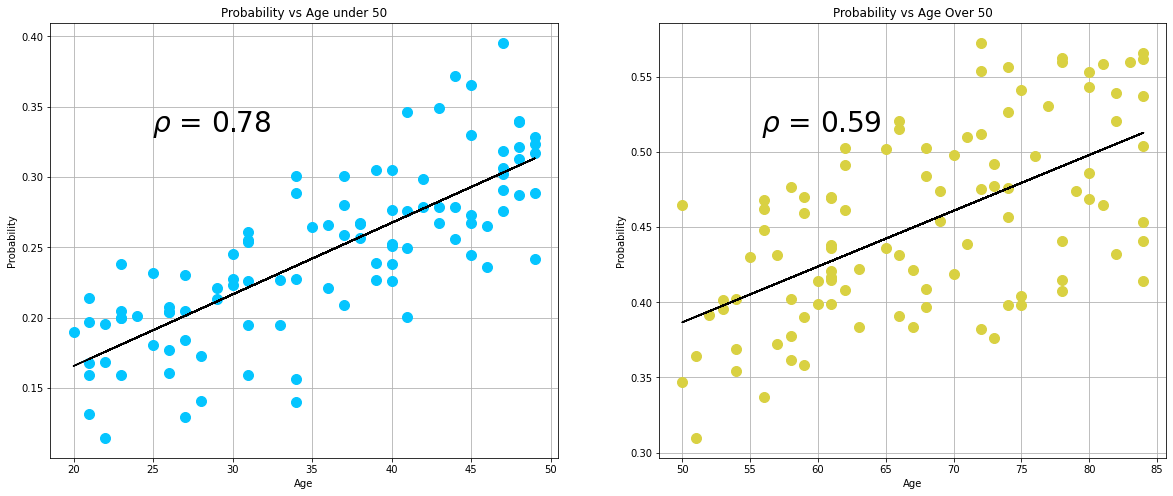

In [10]:
plt.figure(figsize = (20, 8))
x1,y1=np.array(Under_50["Age"]),np.array(Under_50["Probability"])
b,m=polyfit(x1,y1,1)
Under_50.plot(x="Age",y="Probability",c='#04c5ff',style="o",legend=None,ax=plt.subplot(1, 2, 1),ms=10)
plt.plot(x1, m * x1 + b, '-', color = 'k')
plt.grid()
plt.title(f'Probability vs {"Age".capitalize()} under 50')
corr_coef = np.corrcoef(x1, y1)[0][1]
ax=plt.gca()
plt.ylabel("Probability")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)
x2,y2=np.array(Over_50["Age"]),np.array(Over_50["Probability"])
b,m=polyfit(x2,y2,1)
Over_50.plot(x="Age",y="Probability",c='#d9d142',style="o",legend=None,ax=plt.subplot(1, 2, 2),ms=10)
plt.plot(x2, m * x2 + b, '-', color = 'k')
plt.grid()
plt.title(f'Probability vs {"Age".capitalize()} Over 50')
corr_coef = np.corrcoef(x2, y2)[0][1]
ax=plt.gca()
plt.ylabel("Probability")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

Text(0.2, 0.75, '$\\rho$ = 0.92')

<Figure size 720x576 with 0 Axes>

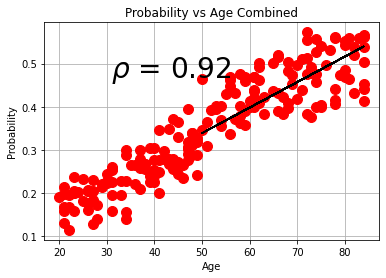

In [11]:
plt.figure(figsize = (10, 8))
x3,y3=np.array(combined["Age"]),np.array(combined["Probability"])
b,m=polyfit(x3,y3,1)
combined.plot(x="Age",y="Probability",c='r',style="o",legend=None,ms=10)
plt.plot(x2, m * x2 + b, '-', color = 'k')
plt.grid()
plt.title(f'Probability vs {"Age".capitalize()} Combined')
corr_coef = np.corrcoef(x3, y3)[0][1]
ax=plt.gca()
plt.ylabel("Probability")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

In [12]:
colors = [ '#04c5ff' for _ in range(n_samples)]
colors.extend(['#d9d142' for _ in range(n_samples)])

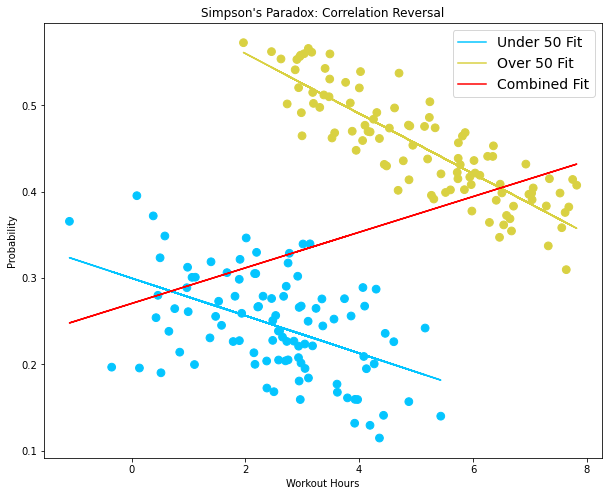

In [13]:
plt.figure(figsize = (10, 8))

plt.scatter(combined['Workout_Hours'],
            combined['Probability'], c = colors, label = None, s = 60);

x_c, y_c = np.array(combined['Workout_Hours']), np.array(combined['Probability'])
b_c, m_c = polyfit(x_c, y_c, 1)

x_u, y_u = np.array(Under_50['Workout_Hours']), np.array(Under_50['Probability'])
b_u, m_u = polyfit(x_u, y_u, 1)

x_o, y_o = np.array(Over_50['Workout_Hours']), np.array(Over_50['Probability'])
b_o, m_o = polyfit(Over_50['Workout_Hours'], Over_50['Probability'], 1)

plt.plot(x_u, b_u + m_u * x_u, c =  '#04c5ff', label = 'Under 50 Fit');
plt.plot(x_o, b_o + m_o * x_o, c = '#d9d142', label = 'Over 50 Fit');
plt.plot(x_c, b_c + m_c * x_c, c = 'r', label = 'Combined Fit');
plt.xlabel('Workout Hours');
plt.ylabel('Probability'); plt.title("Simpson's Paradox: Correlation Reversal");
plt.legend(prop = {'size': 14});

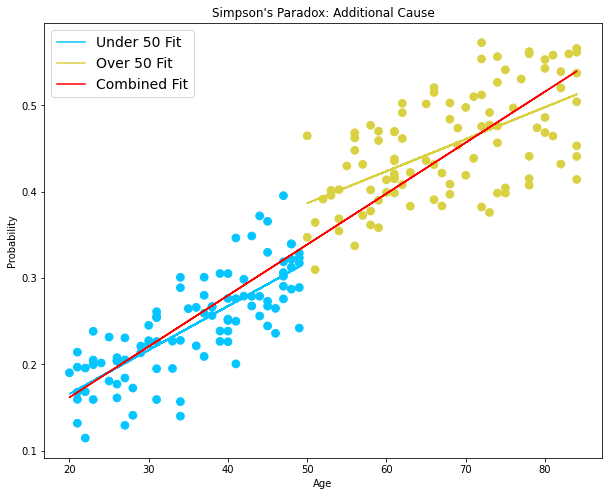

In [14]:
plt.figure(figsize = (10, 8))

plt.scatter(combined['Age'],
            combined['Probability'], c = colors, label = None, s = 60);

x_c, y_c = np.array(combined['Age']), np.array(combined['Probability'])
b_c, m_c = polyfit(x_c, y_c, 1)

x_u, y_u = np.array(Under_50['Age']), np.array(Under_50['Probability'])
b_u, m_u = polyfit(x_u, y_u, 1)

x_o, y_o = np.array(Over_50['Age']), np.array(Over_50['Probability'])
b_o, m_o = polyfit(Over_50['Age'], Over_50['Probability'], 1)

plt.plot(x_u, b_u + m_u * x_u, c =  '#04c5ff', label = 'Under 50 Fit');
plt.plot(x_o, b_o + m_o * x_o, c = '#d9d142', label = 'Over 50 Fit');
plt.plot(x_c, b_c + m_c * x_c, c = 'r', label = 'Combined Fit');
plt.xlabel('Age');
plt.ylabel('Probability'); plt.title("Simpson's Paradox: Additional Cause");
plt.legend(prop = {'size': 14});

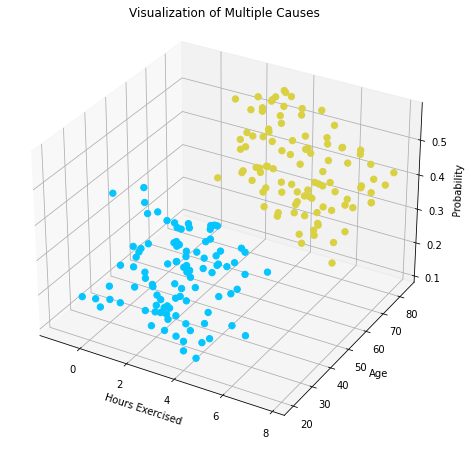

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')


markers = ['.' for _ in range(100)]
markers.extend('o' for _ in range(100))

x_c = np.array(combined['Workout_Hours'])
y_c = np.array(combined['Age'])
z_c = np.array(combined['Probability'])
ax.scatter(x_c, y_c, z_c, c=colors, s = 40, marker='o', alpha = 1.0)

ax.set_xlabel('Hours Exercised')
ax.set_ylabel('Age')
ax.set_zlabel('Probability');
ax.set_title('Visualization of Multiple Causes', y = 1.05);

## Conclusions

Simpson's Paradox is an intriguing statistical phenomenon that demonstrates the importance of thinking causally by asking why - determining the data generation process. Once we know how the data is generated, we can look for the other factors we are not being shown and resolve the paradox by either keeping the data separated, or aggregating the data.



## **Workout Problem From The Real Life Example**

Here we are mainly using a toy example from the real world problem to further illustrate the **Simpson's Paradox** phenomenon.Here We are mainly using the **Red Wine Quality Test Dataset** to justify the cause.

### Dataset And Problem Description

### **Red Wine Quality Test**

* Number of Instances: red wine - 1599; white wine - 4898. 
* Number of Attributes: 11 + output attribute
* **Note**: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

### **Attribute information:**

Input variables (based on physicochemical tests):
- fixed acidity (tartaric acid - g / dm^3)
- volatile acidity (acetic acid - g / dm^3)
- citric acid (g / dm^3)
- residual sugar (g / dm^3)
- chlorides (sodium chloride - g / dm^3
- free sulfur dioxide (mg / dm^3)
- total sulfur dioxide (mg / dm^3)
- density (g / cm^3)
- pH
- sulphates (potassium sulphate - g / dm3)
- alcohol (% by volume)
- Output variable (based on sensory data): quality (score between 0 and 10)

### **Description of attributes:**

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

### **Importing The Datasets**

In [115]:
data=pd.read_csv("data/wineQualityReds.csv")
data

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **Exploratory Data Analysis**

This is the required exploratory data analysis where we have seperatedly done the information of the each of columns of the dataset.

In [116]:
data.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **Correlation Plot**

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
sns.set_theme(style="dark")

In [133]:
corr = data.corr()

<AxesSubplot:>

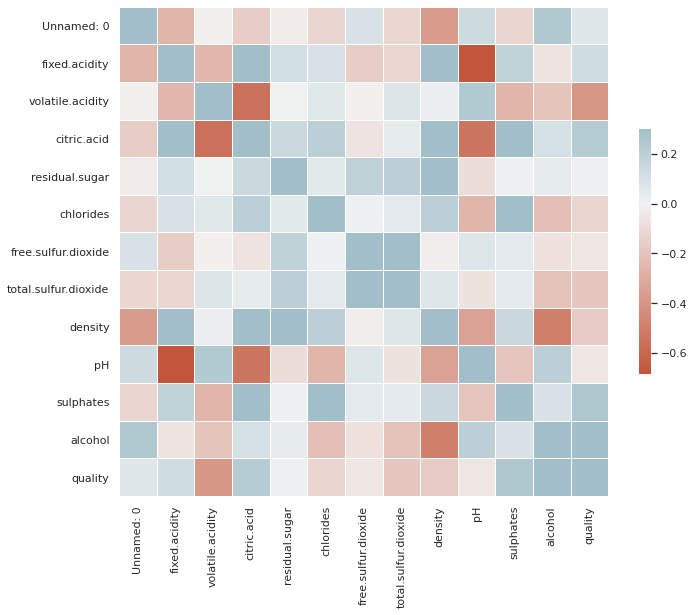

In [134]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmax=.3, center=0,cmap=sns.diverging_palette(20, 220, n=256),
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The relationship among the different variables of the dataset are clearly visible among the datasets.

In [18]:
data.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### Eda of the Variables for which we have seen the Simpson's Paradox

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='quality', ylabel='Count'>

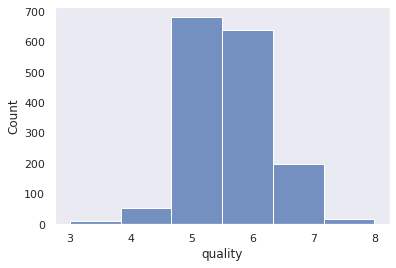

In [136]:
sns.histplot(data=data, x="quality",bins=6)

**Classifying the Wines Based On The Datasets**

In [21]:
data["rating"]=pd.cut(data["quality"],
       3, labels=["bad", "medium", "good"])

In [22]:
data

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rating
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium


<AxesSubplot:xlabel='rating', ylabel='Count'>

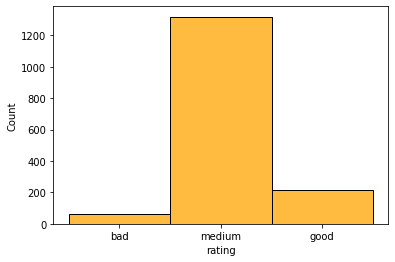

In [23]:
sns.histplot(data=data, x="rating",bins=3,binwidth=1,color="orange")

From the above plots we can easily infer that most of the data are of average quality wines. 

Our main Focus on the Acidity Levels and the Ph wchich are most likely to make an example of the **Simpson's Paradox**.Thus we would do a quick EDA. 

<AxesSubplot:xlabel='fixed.acidity', ylabel='Count'>

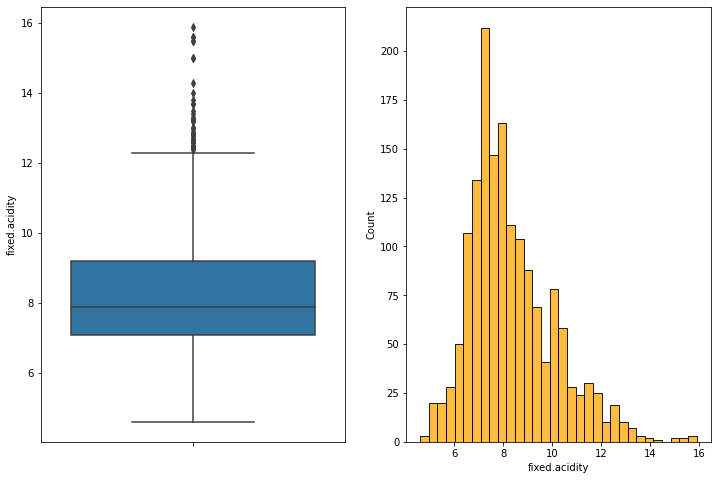

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
ax = sns.boxplot(y="fixed.acidity", data=data)
plt.subplot(1,2,2)
sns.histplot(data=data, x="fixed.acidity",color="orange")

<AxesSubplot:xlabel='volatile.acidity', ylabel='Count'>

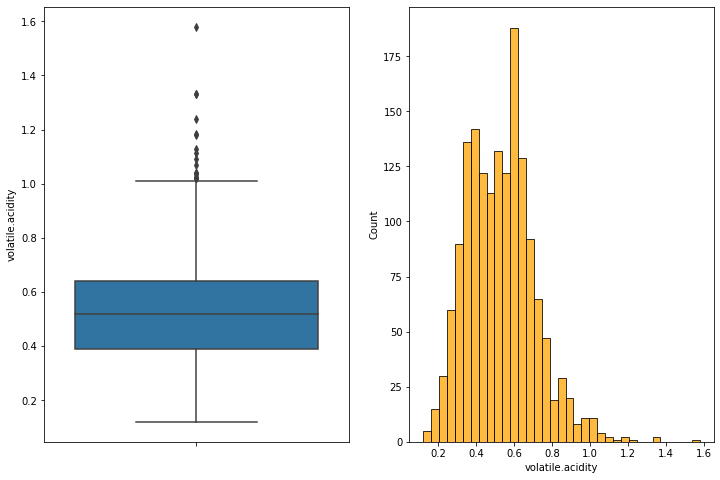

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
ax = sns.boxplot(y="volatile.acidity", data=data)
plt.subplot(1,2,2)
sns.histplot(data=data, x="volatile.acidity",color="orange")

The distribution of Volatile acidity looks like Bimodal with two peaks around 0.4 and 0.6.

<AxesSubplot:xlabel='pH', ylabel='Count'>

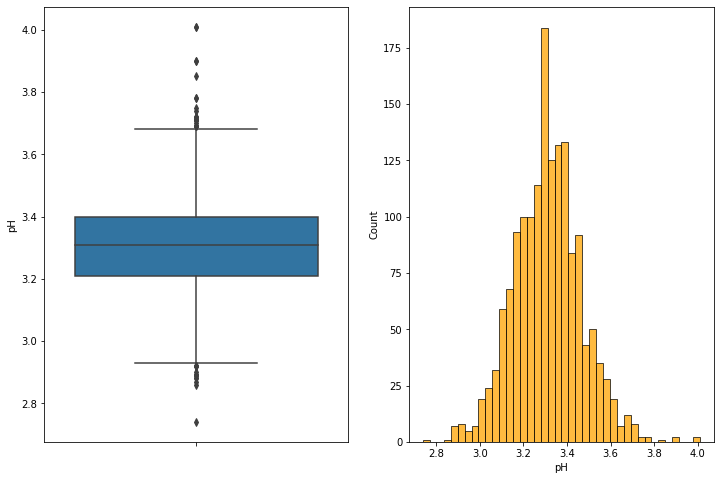

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
ax = sns.boxplot(y="pH", data=data)
plt.subplot(1,2,2)
sns.histplot(data=data, x="pH",color="orange")

The distribution of pH looks perfectly Normal in shape.

In [28]:
bad=data[data["rating"]=="bad"]
bad

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rating
18,19,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,4,bad
38,39,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80,4,bad
41,42,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,4,bad
45,46,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,4,bad
73,74,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1481,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.10,4,bad
1482,1483,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30,4,bad
1484,1485,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.90,4,bad
1505,1506,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,bad


Text(0.2, 0.75, '$\\rho$ = 0.23')

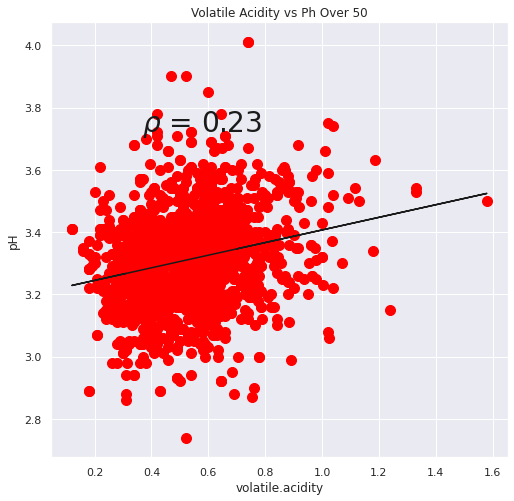

In [140]:
plt.figure(figsize=(18,8))
x2,y2=np.array(data["volatile.acidity"]),np.array(data["pH"])
b,m=polyfit(x2,y2,1)
data.plot(x="volatile.acidity",y="pH",c='red',style="o",legend=None,ax=plt.subplot(1, 2, 2),ms=10)
plt.plot(x2, m * x2 + b, '-', color = 'k')
plt.grid()
plt.title(f'Volatile Acidity vs {"pH".capitalize()} Over 50')
corr_coef = np.corrcoef(x2, y2)[0][1]
ax=plt.gca()
plt.ylabel("pH")

plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

## **Clustering**

There are two main features for which the Simpson's Paradox is visible prominently.They are:-
- **Volatile Acidity**
- **pH**

Here we are taking the help of the **sklearn library** to make the clustering . The technique we are using for clustering is the **KMeans clustering**. We have mainly clustered the data into two main dominant parts or sub groups. we have labelled the two classes as :-
- **class1**
- **class2**

In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()


In [78]:
features=data.iloc[:,[2,9]]
#len(features)
features

,volatile.acidity,pH
0,0.700,3.51
1,0.880,3.20
2,0.760,3.26
3,0.280,3.16
4,0.700,3.51
...,...,...
1594,0.600,3.45
1595,0.550,3.52
1596,0.510,3.42
1597,0.645,3.57


### **Visualization Of the Clusters**

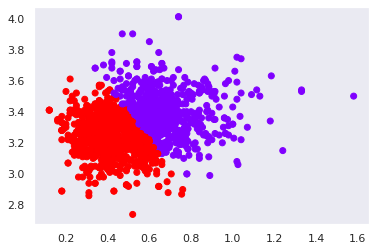

In [145]:
from sklearn.cluster import KMeans
est = KMeans(2)  # 4 clusters
est.fit(features)
y_kmeans = est.predict(features)
plt.scatter(features["volatile.acidity"], features["pH"], c=y_kmeans, cmap='rainbow')


In [79]:
data["target"]=y_kmeans

## DataFrame containing the Class Knowledge

In [146]:
features["target"]=y_kmeans
features

<ipython-input-146-20b90340646f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["target"]=y_kmeans


,volatile.acidity,pH,target
0,0.700,3.51,0
1,0.880,3.20,0
2,0.760,3.26,0
3,0.280,3.16,1
4,0.700,3.51,0
...,...,...,...
1594,0.600,3.45,0
1595,0.550,3.52,0
1596,0.510,3.42,0
1597,0.645,3.57,0


The target column of the dataframe contains the knowledge of the clusters.

In [86]:
class1=features[features["target"]==0]
class1
class2=features[features["target"]==1]

### **Trend Visualization**

#### **Individual Cluster Trend**

Text(0.2, 0.75, '$\\rho$ = -0.26')

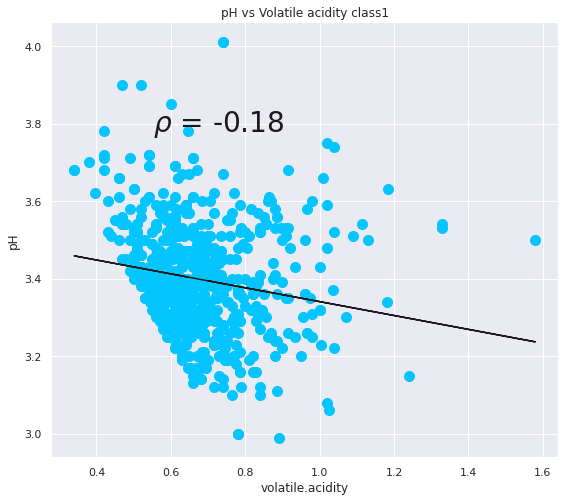

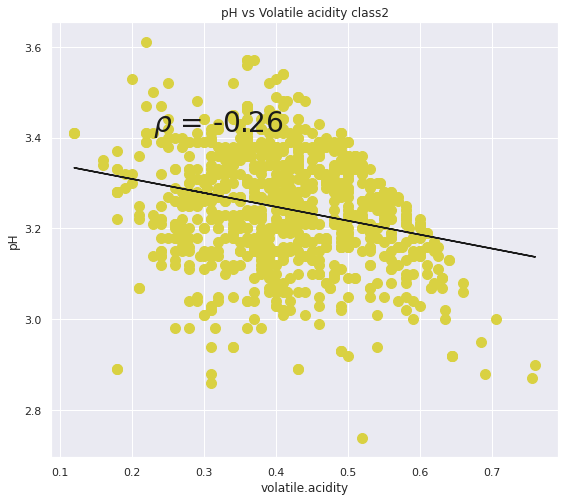

In [98]:
plt.figure(figsize = (20, 8))
x1,y1=np.array(class1["volatile.acidity"]),np.array(class1["pH"])
b1,m1=polyfit(x1,y1,1)
class1.plot(x="volatile.acidity",y="pH",c='#04c5ff',style="o",legend=None,ax=plt.subplot(1, 2, 1),ms=10)
plt.plot(x1, m1 * x1 + b1, '-', color = 'k')
plt.grid()
plt.title(f'pH vs {"volatile acidity".capitalize()} class1')
corr_coef = np.corrcoef(x1, y1)[0][1]
ax=plt.gca()
plt.grid()
plt.ylabel("pH")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)
plt.figure(figsize = (20, 8))
x2,y2=np.array(class2["volatile.acidity"]),np.array(class2["pH"])
b2,m2=polyfit(x2,y2,1)
class2.plot(x="volatile.acidity",y="pH",c='#d9d142',style="o",legend=None,ax=plt.subplot(1, 2, 2),ms=10)
plt.plot(x2, m2 * x2 + b2, '-', color = 'k')
plt.grid()
plt.title(f'pH vs {"volatile acidity".capitalize()} class2')
corr_coef = np.corrcoef(x2, y2)[0][1]
ax=plt.gca()
plt.grid()
plt.ylabel("pH")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

### **Overall Trend**

Text(0.2, 0.75, '$\\rho$ = 0.23')

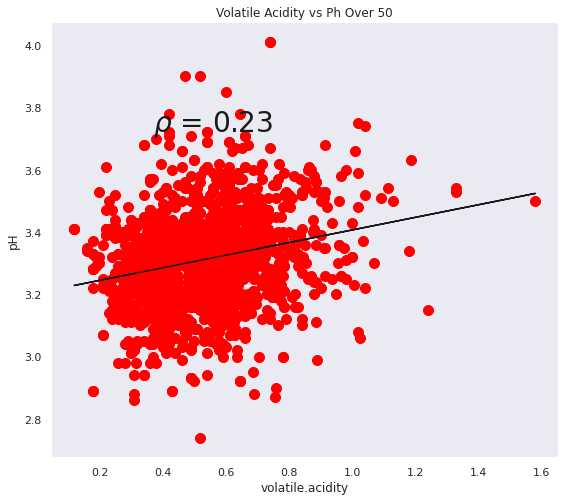

In [100]:
plt.figure(figsize=(20,8))
x2,y2=np.array(data["volatile.acidity"]),np.array(data["pH"])
b,m=polyfit(x2,y2,1)
data.plot(x="volatile.acidity",y="pH",c='red',style="o",legend=None,ax=plt.subplot(1, 2, 2),ms=10)
plt.plot(x2, m * x2 + b, '-', color = 'k')
plt.grid()
plt.title(f'Volatile Acidity vs {"pH".capitalize()} Over 50')
corr_coef = np.corrcoef(x2, y2)[0][1]
ax=plt.gca()
plt.ylabel("pH")
plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

In [103]:
colors = [ '#04c5ff' for _ in range(len(class1))]
colors.extend(['#d9d142' for _ in range(len(class2))])

## **Simpson's Paradox Visualisation**

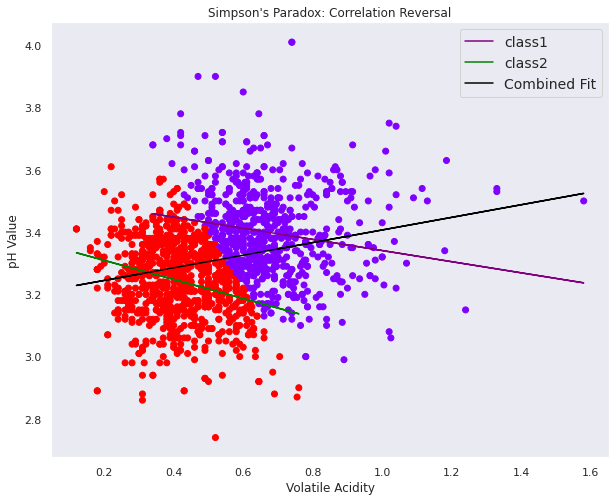

In [137]:
plt.figure(figsize = (10, 8))

plt.scatter(features["volatile.acidity"], features["pH"], c=y_kmeans, cmap='rainbow')

x_c, y_c = np.array(features['volatile.acidity']), np.array(features['pH'])
b_c, m_c = polyfit(x_c, y_c, 1)

x_u, y_u = np.array(class1['volatile.acidity']), np.array(class1['pH'])
b_u, m_u = polyfit(x_u, y_u, 1)

x_o, y_o = np.array(class2['volatile.acidity']), np.array(class2['pH'])
b_o, m_o = polyfit(x_o, y_o, 1)

plt.plot(x_u, b_u + m_u * x_u, c =  'purple', label = 'class1');
plt.plot(x_o, b_o + m_o * x_o, c = 'green', label = 'class2');
plt.plot(x_c, b_c + m_c * x_c, c = 'black', label = 'Combined Fit');
plt.xlabel('Volatile Acidity');
plt.ylabel('pH Value'); plt.title("Simpson's Paradox: Correlation Reversal");
plt.legend(prop = {'size': 14});

So it is indeed **Simpson’s paradox** which was responsible for the trend reversal of Volatile Acid vs pH. We have  clustered the data into Two segments and calculated the regression coefficient. We see that there is indeed a sign of **Trend reversal**.

